# Project: IDBM Dataset Analysis

 ## Table of Content
- Introduction
- Data Wraggling
- Exploratory Data Analysis
- Conclusion




### 1. ## Top 5 grossed movies
### 2.  Highest Average Revenue By Year
### 2a. Highest Average Revenue By Year
###  Factors that may affect revenue
### 4. What kinds of properties are associated with movies that have high revenues?
### 3. Directors with high revenue movies
### 4.Top Rated Directors by Vote
### 5. Top Rated Directors by Vote
### 5. Which year has most movies released and did those year generated the most revenue?
### 7. Which year has most movies released
### 6. What are the top 10 most lenghty movies
### 7. Year with highest voting Participants
### 8. Who are the most featured actors or actresses

In [494]:
#importing dependables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import operator
import warnings
warnings.filterwarnings('ignore')  ## to turn off warnings that are not needed
pd.options.display.float_format = '{:,.2f}'.format ## to round lots of decimal places to just two



## General Properties of Dataset

In [495]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


In [496]:
df.shape

(10866, 21)

In [497]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [498]:
#showing basic statistics.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [499]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [500]:
#dropping unnecessary columns

df = df.drop(columns= ['tagline','keywords','homepage','overview'], axis = 1)


In [501]:

df.shape

(10866, 17)

In [502]:
#removing NaN data from cast, genres and zero budgest from movies.

df = df[df["cast"].isnull() == False]
df = df[df["genres"].isnull() == False]

df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [503]:
# removing duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)

## Top 5 grossed movies

In [504]:

df_grossing = df[['revenue','original_title']].sort_values(by= 'revenue', ascending = False).head(5).reset_index()

df_grossing


,index,revenue,original_title
0,1386,2781505847,Avatar
1,3,2068178225,Star Wars: The Force Awakens
2,5231,1845034188,Titanic
3,4361,1519557910,The Avengers
4,0,1513528810,Jurassic World


0                          Avatar
1    Star Wars: The Force Awakens
2                         Titanic
3                    The Avengers
4                  Jurassic World
Name: original_title, dtype: object


<BarContainer object of 5 artists>

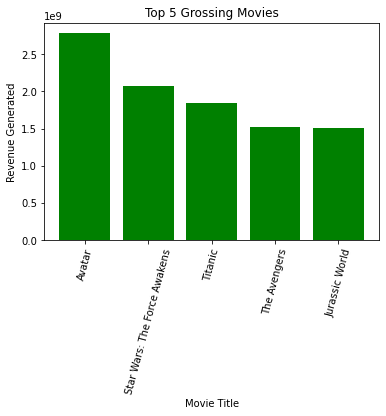

In [505]:
x = df_grossing['original_title']
print(x)
y = df_grossing['revenue']
plt.title('Top 5 Grossing Movies')
plt.xlabel('Movie Title')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=75)
plt.bar(x,y, color='green')

## 2. Highest Average Revenue By Year

In [506]:
ave_revenue = df.groupby('release_year').revenue.mean()
ave_revenue.head(5)

release_year
1960   25,801,000.00
1961   33,772,018.80
1962   29,475,692.29
1963   29,421,147.00
1964   46,944,792.57
Name: revenue, dtype: float64

## 2a. Factors that may affect revenue

In [507]:
#revenue-duration relationship
revenue_duration = df.groupby(['original_title', 'runtime'], as_index=False)['revenue'].mean()
revenue_duration.describe()


,runtime,revenue
count,"3,848.00","3,848.00"
mean,109.23,"107,801,220.88"
std,19.93,"176,628,456.20"
min,15.00,2.00
25%,95.00,"13,617,405.25"
50%,106.00,"44,884,723.50"
75%,119.00,"124,377,985.25"
max,338.00,"2,781,505,847.00"


## 3. Directors with high revenue movies

In [508]:
df_directors = df.groupby('director').revenue.mean().sort_values(ascending = False).head(7)
df_directors


director
Chris Buck|Jennifer Lee                     1,274,219,009.00
Kyle Balda|Pierre Coffin                    1,156,730,962.00
Irwin Winkler                               1,106,279,658.00
Lee Unkrich                                 1,063,171,911.00
David Yates                                 1,038,573,906.25
Andrew Adamson|Kelly Asbury|Conrad Vernon     919,838,758.00
Steve Martino|Mike Thurmeier                  877,244,782.00
Name: revenue, dtype: float64

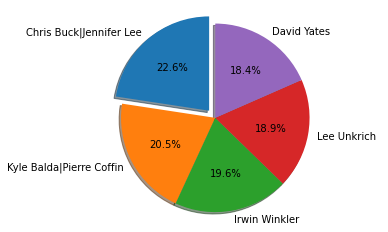

In [509]:
labels = ['Chris Buck|Jennifer Lee','Kyle Balda|Pierre Coffin','Irwin Winkler','Lee Unkrich','David Yates']
revenue = [1274219009, 1156730962, 1106279658, 1063171911, 1038573906]

explode = (0.1, 0, 0, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(revenue, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
# fig = plt.figure(figsize =(10, 7))
# plt.pie(revenue, labels = labels)
# plt.show()

 - Generally, revenue increases with duration
 - Also, the abouve directors are known for highe revenue generating movies   

## 4.Top Rated Directors by Vote

In [510]:
df_rated_directors = df.groupby('director').vote_average.mean().sort_values(ascending = False)
df_rated_directors.head(5)

director
Damien Chazelle    8.20
Lenny Abrahamson   8.00
Tony Kaye          8.00
Pete Docter        8.00
Morten Tyldum      8.00
Name: vote_average, dtype: float64

 - The results shows that even, a director highly rated does not necesarily mean they churned a high grossing movie
 - This is because for directors who were in the top 5 based on revenue, generated, they are not in the list of most voted for direcotrs

## 5. Which year has most movies released and did those year generated the most revenue?

In [511]:
most_release = df['release_year'].value_counts().head(5)
most_release

2011    199
2013    180
2010    178
2009    174
2006    169
Name: release_year, dtype: int64

In [512]:
# mos = df.loc[df['release_year'].isin([2011, 2013, 2010, 2009,2006])] ##works
pd.options.display.float_format = '{:,.2f}'.format
revenue_2011 = df.loc[df['release_year'] == 2011]
revenue_2013 = df.loc[df['release_year'] == 2013]
revenue_2010 = df.loc[df['release_year'] == 2010]
revenue_2009 = df.loc[df['release_year'] == 2009]
revenue_2006 = df.loc[df['release_year'] == 2006]

value_11 = revenue_2011.revenue.sum()
value_13 = revenue_2013.revenue.sum()
value_10 = revenue_2010.revenue.sum()
value_09 = revenue_2009.revenue.sum()
value_06 = revenue_2006.revenue.sum()
c = [value_11,value_13,value_10, value_09,value_06]


[23408245247, 24350666103, 21804360476, 21607132990, 15640517999]


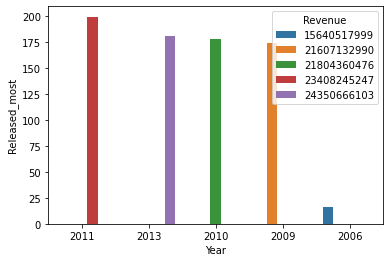

In [513]:
a = [2011,2013,2010,2009, 2006]
b = [199, 180,178,174,169]
c = [value_11,value_13,value_10, value_09,value_06]
print(c)
df_bar = pd.DataFrame({'Year':['2011','2013','2010','2009', '2006'],
                   'Released_most':[199, 180,178,174,16],
                   'Revenue': [value_11,value_13,value_10, value_09,value_06]})
sns.barplot(x='Year', y='Released_most', hue='Revenue', data=df_bar)
plt.show()

 - The plot above shows that, the years with most releases did not earn the most revenue respectively. Thus, more release does not equate to more revenue generated in that year

### 6. What are the top 10 most lenghty movies

In [514]:
most_lengthy = df.nlargest(10, 'runtime')[['original_title','runtime']].reset_index()
most_lengthy

,index,original_title,runtime
0,2107,Carlos,338
1,10443,Cleopatra,248
2,7332,Heaven's Gate,219
3,9850,Lawrence of Arabia,216
4,5065,Gods and Generals,214
5,3110,Jodhaa Akbar,213
6,8282,Malcolm X,202
7,4949,The Lord of the Rings: The Return of the King,201
8,9758,The Godfather: Part II,200
9,10716,The Greatest Story Ever Told,199


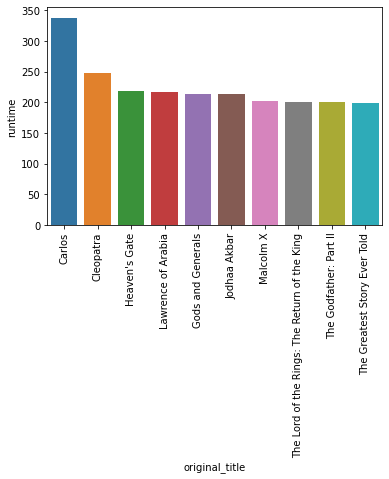

In [515]:
sns.barplot(x='original_title', y = most_lengthy.runtime, data = most_lengthy)
plt.xticks(rotation=90)
plt.show()

## 7. Year with highest voting Participants

In [516]:
year_votes = df.groupby('release_year').vote_count.mean().sort_values(ascending = False).head(5)
year_votes


release_year
2014   1,029.83
2012   1,023.04
2013   1,014.48
2015     971.06
2010     648.76
Name: vote_count, dtype: float64

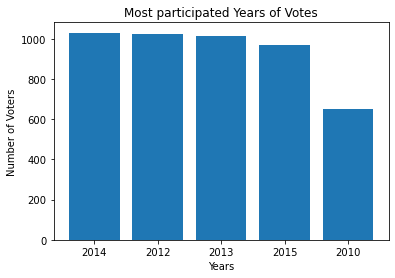

In [517]:
x = ['2014','2012','2013','2015','2010']
y = [1029.83,1023.04,1014.48,971.06,648.76]

plt.bar(x,y)
plt.xlabel('Years')
plt.ylabel('Number of Voters')
plt.title('Most participated Years of Votes')
plt.show()

## 8. Most featured actors

In [518]:
list_of_actors = {}

all_cast = df["cast"]
all_cast = all_cast.str.split("|")
all_cast = np.array(all_cast)
for actors in all_cast:
    
    for actor in actors:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in list_of_actors:
            list_of_actors[actor] = 1
        else:
            list_of_actors[actor] += 1
                


sorted_actor_dict = sorted(list_of_actors.items(), key = operator.itemgetter(1), reverse = True)
sorted_actor_dict[0:10]


[('Robert De Niro', 52),
 ('Bruce Willis', 46),
 ('Samuel L. Jackson', 44),
 ('Nicolas Cage', 43),
 ('Matt Damon', 36),
 ('Johnny Depp', 35),
 ('Harrison Ford', 34),
 ('Brad Pitt', 34),
 ('Tom Hanks', 34),
 ('Sylvester Stallone', 34)]

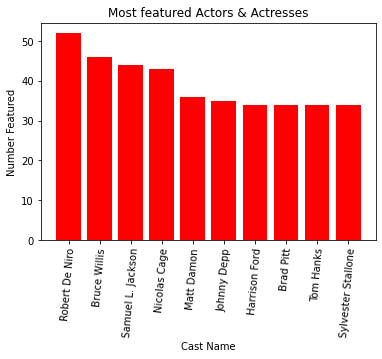

In [519]:
x= [sorted_actor_dict[0][0],sorted_actor_dict[1][0],sorted_actor_dict[2][0],
    sorted_actor_dict[3][0],sorted_actor_dict[4][0],
    sorted_actor_dict[5][0],sorted_actor_dict[6][0],
    sorted_actor_dict[7][0],sorted_actor_dict[8][0],sorted_actor_dict[9][0]]

y = [sorted_actor_dict[0][1],sorted_actor_dict[1][1],sorted_actor_dict[2][1],sorted_actor_dict[3][1],sorted_actor_dict[4][1],
    sorted_actor_dict[5][1],sorted_actor_dict[6][1],
    sorted_actor_dict[7][1],sorted_actor_dict[8][1],sorted_actor_dict[9][1]]

plt.bar(x,y, color= 'red')
plt.xlabel('Cast Name')
plt.ylabel('Number Featured')
plt.title('Most featured Actors & Actresses')
plt.xticks(rotation=85)

plt.show()


## Conclusion


The initial 21 columns provided makes it relatively easier to work on the dataset,since there are enough data and information. However, not all of these columns were needed for the ananlysis and were dropped. It is worthy to note that it had few duplicates for a dataset this large. However, null values, and columns with zero values could be misleading since it gives a sense of correct data. It is apparent that these were incorrect, and this was a limitation of dataset, since these values had to be dropped. It was revealed that, some of the most voted directors, were not necessarily those with high grossing movies and In years where most movies were released, there was not a corresponding match for most revenue yields.Big name cast were most featured, with Nicolas Cage, Robert De Niro and Bruce Willis being amongst these big names.
